# Ecommerce customer Behavior Analysis

###   Import libraries and load data

In [3]:
#import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns

In [5]:
#load and read data
df=pd.read_csv('Desktop/Ecommerce_Consumer_Behavior_Analysis_Data.csv')
df.head()

,Customer_ID,Age,Gender,Income_Level,Marital_Status,Education_Level,Occupation,Location,Purchase_Category,Purchase_Amount,...,Customer_Satisfaction,Engagement_with_Ads,Device_Used_for_Shopping,Payment_Method,Time_of_Purchase,Discount_Used,Customer_Loyalty_Program_Member,Purchase_Intent,Shipping_Preference,Time_to_Decision
0,37-611-6911,22,Female,Middle,Married,Bachelor's,Middle,Évry,Gardening & Outdoors,$333.80,...,7,NaN,Tablet,Credit Card,3/1/2024,True,False,Need-based,No Preference,2
1,29-392-9296,49,Male,High,Married,High School,High,Huocheng,Food & Beverages,$222.22,...,5,High,Tablet,PayPal,4/16/2024,True,False,Wants-based,Standard,6
2,84-649-5117,24,Female,Middle,Single,Master's,High,Huzhen,Office Supplies,$426.22,...,7,Low,Smartphone,Debit Card,3/15/2024,True,True,Impulsive,No Preference,3
3,48-980-6078,29,Female,Middle,Single,Master's,Middle,Wiwilí,Home Appliances,$101.31,...,1,NaN,Smartphone,Other,10/4/2024,True,True,Need-based,Express,10
4,91-170-9072,33,Female,Middle,Widowed,High School,Middle,Nara,Furniture,$211.70,...,10,NaN,Smartphone,Debit Card,1/30/2024,False,False,Wants-based,No Preference,4


###  Data cleaning

In [8]:
#drop unrelated/blank columns
df.drop(['Time_Spent_on_Product_Research(hours)', 'Social_Media_Influence','Discount_Sensitivity','Return_Rate','Device_Used_for_Shopping','Education_Level', 'Customer_Loyalty_Program_Member','Purchase_Intent','Shipping_Preference','Time_to_Decision'], axis=1, inplace=True)

In [10]:
# Check null values and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Customer_ID            1000 non-null   object
 1   Age                    1000 non-null   int64 
 2   Gender                 1000 non-null   object
 3   Income_Level           1000 non-null   object
 4   Marital_Status         1000 non-null   object
 5   Occupation             1000 non-null   object
 6   Location               1000 non-null   object
 7   Purchase_Category      1000 non-null   object
 8   Purchase_Amount        1000 non-null   object
 9   Frequency_of_Purchase  1000 non-null   int64 
 10  Purchase_Channel       1000 non-null   object
 11  Brand_Loyalty          1000 non-null   int64 
 12  Product_Rating         1000 non-null   int64 
 13  Customer_Satisfaction  1000 non-null   int64 
 14  Engagement_with_Ads    744 non-null    object
 15  Payment_Method        

In [12]:
df.dropna(inplace=True)

In [14]:
df.duplicated().sum()

0

In [16]:
# Convert Purchase_Amount to float
df['Purchase_Amount'] = df['Purchase_Amount'].str.replace('$', '').astype('float')

# Convert Time_of_Purchase to datetime
df['Time_of_Purchase'] = pd.to_datetime(df['Time_of_Purchase'], errors='coerce')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 744 entries, 1 to 999
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Customer_ID            744 non-null    object        
 1   Age                    744 non-null    int64         
 2   Gender                 744 non-null    object        
 3   Income_Level           744 non-null    object        
 4   Marital_Status         744 non-null    object        
 5   Occupation             744 non-null    object        
 6   Location               744 non-null    object        
 7   Purchase_Category      744 non-null    object        
 8   Purchase_Amount        744 non-null    float64       
 9   Frequency_of_Purchase  744 non-null    int64         
 10  Purchase_Channel       744 non-null    object        
 11  Brand_Loyalty          744 non-null    int64         
 12  Product_Rating         744 non-null    int64         
 13  Customer_S

# Explanatory Data Analysis

###   Histogram for distribution of age

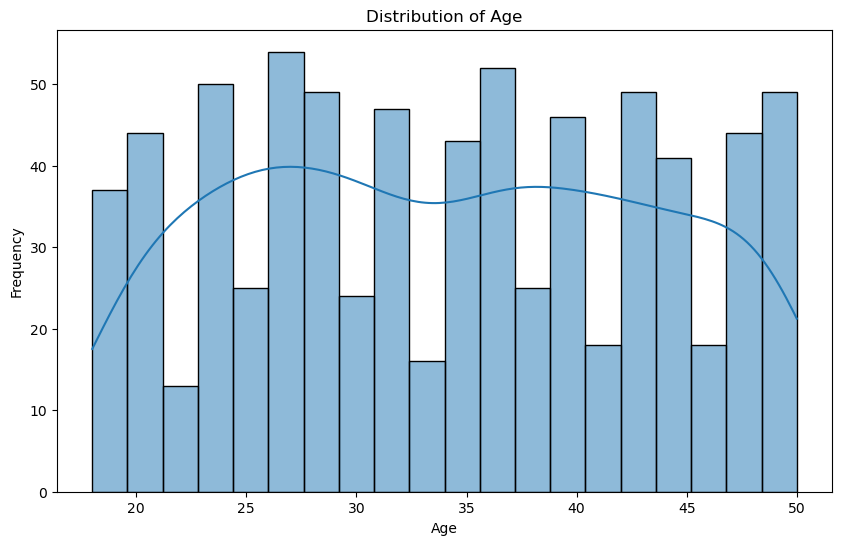

In [22]:
## Histogram for Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

*The histogram above shows the frequency of customers according to the age.*

###   Countplot for Gender Distribution

C:\Users\parth\AppData\Local\Temp\ipykernel_8388\3511717780.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df.head(40), palette='pastel')


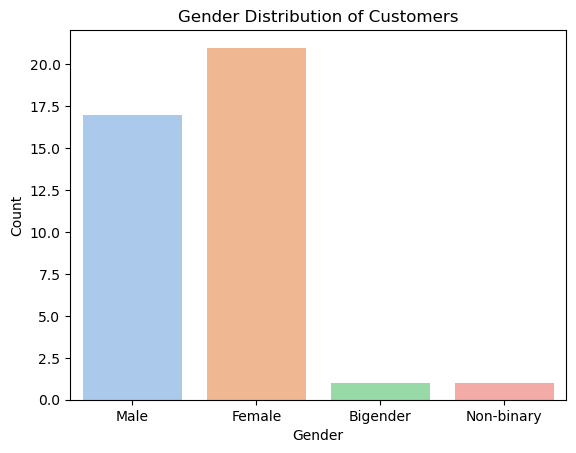

In [25]:
# Gender distribution
sns.countplot(x='Gender', data=df.head(40), palette='pastel')
plt.title('Gender Distribution of Customers')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

*The above graph shows that the most number of customers are females*

### Line chart for monthly sales trend

In [28]:
# Aggregate sales per month
df_monthly = df.groupby(df["Time_of_Purchase"].dt.to_period("M"))["Purchase_Amount"].sum()
df_monthly

Time_of_Purchase
2024-01    14367.68
2024-02    14489.11
2024-03    20276.08
2024-04    21873.40
2024-05    13317.16
2024-06    20640.12
2024-07    18497.74
2024-08    19830.51
2024-09    17452.04
2024-10    16114.08
2024-11    15779.55
2024-12    12645.45
Freq: M, Name: Purchase_Amount, dtype: float64

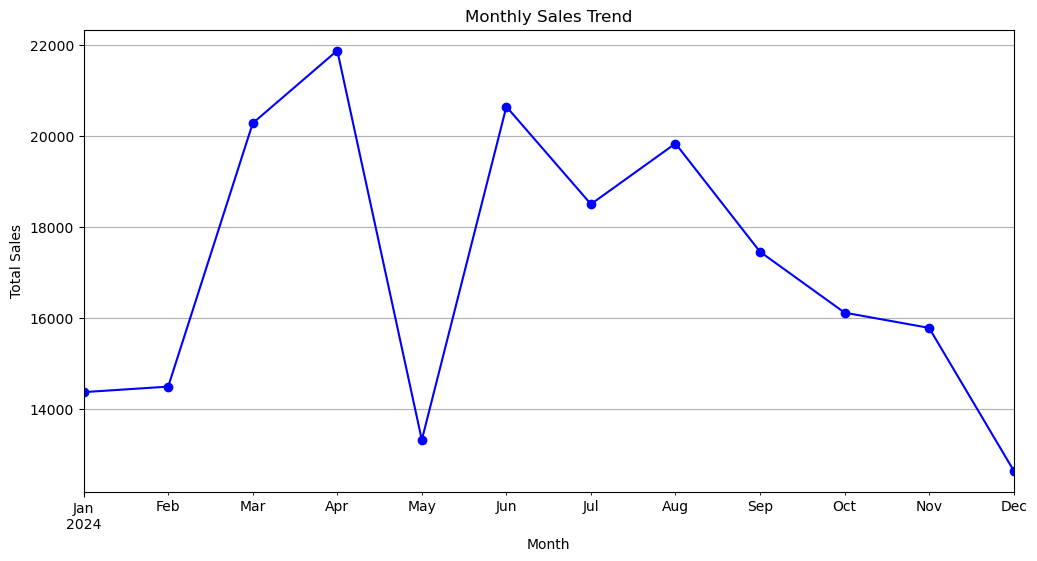

In [30]:
# Plot sales trend
plt.figure(figsize=(12,6))
df_monthly.plot(kind="line", marker="o", color="b")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid()
plt.show()

*The above line chart shows that sales trend went low in the month of may and december*

###   Horizontal bar chart for Top 10 locations with highest sales

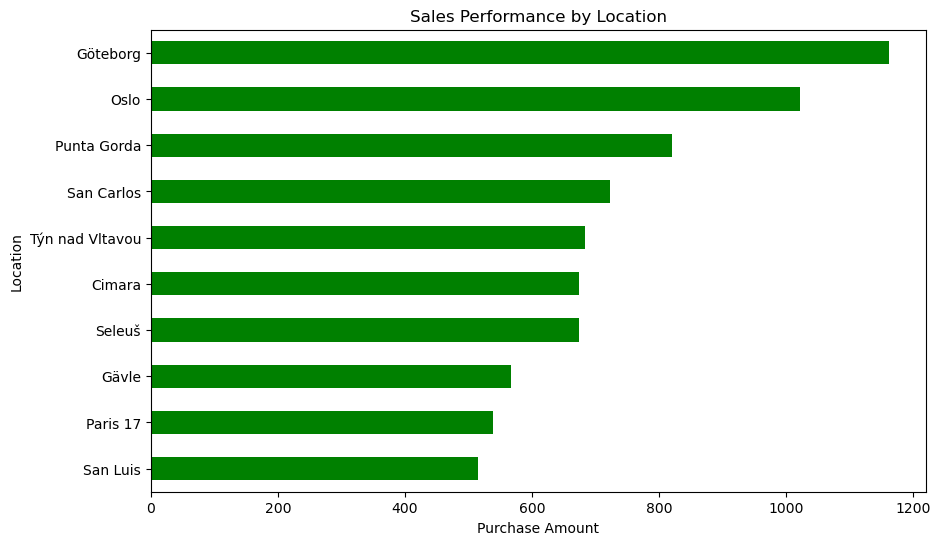

In [33]:
df.groupby('Location')['Purchase_Amount'].sum().sort_values(ascending=True).tail(10).plot(kind='barh', figsize=(10,6), color='green')
plt.title("Sales Performance by Location")
plt.xlabel('Purchase Amount')
plt.ylabel('Location')
plt.show()

*This horizontal barplot shows us the location with highest sales. We can see that Goteborg has the highest sales.*

###   Countplot to show the distribution of different payment methods used by customers

C:\Users\parth\AppData\Local\Temp\ipykernel_8388\60846597.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Payment_Method", data=df, palette="Set2")


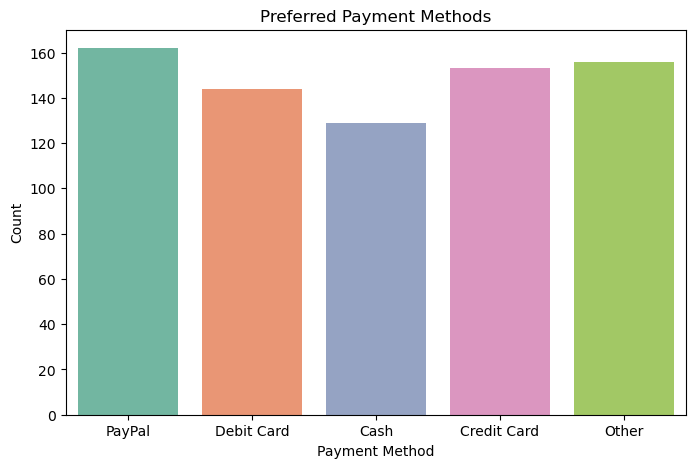

In [48]:
plt.figure(figsize=(8, 5))
sns.countplot(x="Payment_Method", data=df, palette="Set2")
plt.title("Preferred Payment Methods")
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.show()

*From the above countplot we can see that people are using other modes of payment more than paying in cash.*